### PCA algorithm for decorrelation of image RGB properties

> import statements

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

> reading image (image.jpg)

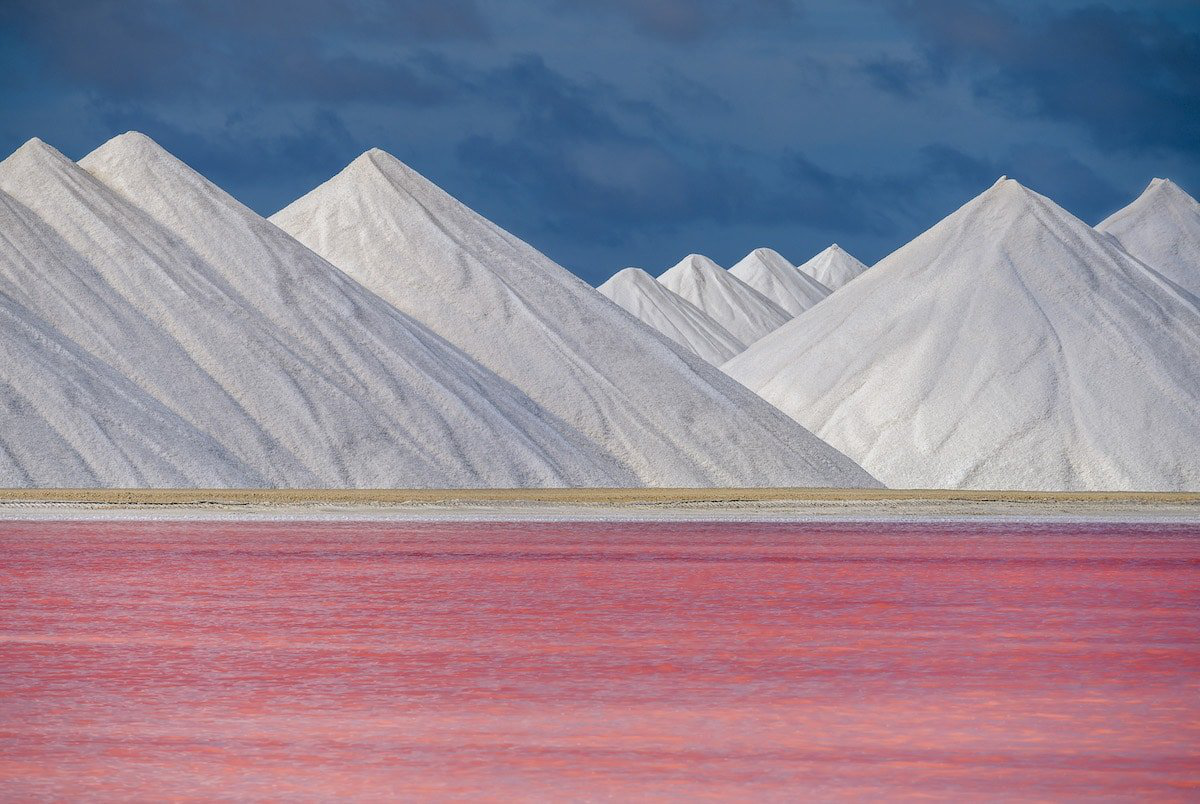

In [58]:
image = Image.open( "image.jpg")

image

> convert image into array

In [59]:
image_data = np.array( image)

shape = image_data.shape

shape

(804, 1200, 3)

> reshaping image 3d matrix into 2d matrix where RGB components become the columns

In [60]:
image_2D_data = image_data.reshape( -1, 3)

image_2D_data.shape

(964800, 3)

#### PCA Algorithm

> Step 1) centering data around mean

In [61]:
centered_image = image_2D_data - image_2D_data.mean( axis=0)

> Step 2) calculating covariance matrix

In [62]:
image_covariance = np.cov( centered_image, rowvar=False)

image_covariance

array([[3090.47993452, 1327.58079715,  579.3836035 ],
       [1327.58079715, 1391.81492113,  960.59133876],
       [ 579.3836035 ,  960.59133876,  777.36606716]])

> Step 3) calculating eigen values and eigen vectors

In [63]:
eigen_values, eigen_vectors = np.linalg.eigh( image_covariance)

> Step 4) sorting eigen values and their corresponding eigen vector in descending order

In [64]:
idx = eigen_values[::-1].argsort()
eigen_values = eigen_values[ idx]
eigen_vectors = eigen_vectors[:, idx]

print( f"Eigen Values: { eigen_values}")
print( f"Eigen Vectors: { eigen_vectors}")

Eigen Values: [4107.46180146 1123.49012088   28.70900047]
Eigen Vectors: [[-0.81683394 -0.5575738   0.14796543]
 [-0.50067664  0.55782037 -0.66193605]
 [-0.28654006  0.61477467  0.73481079]]


> Step 5) recast data along the principal components axes

In [65]:
recast_image = np.dot( eigen_vectors.T, centered_image.T)

> mapping RGB of recast image into range of [0, 255]

In [66]:
mapped_recast_image = np.clip( recast_image, 0, 255).astype( "uint8")

> reshaping 2D matrix of mapped recast image into 3D inorder to present

In [67]:
final_image_data = mapped_recast_image.T.reshape( shape)

final_image_data.shape

(804, 1200, 3)

> the final result

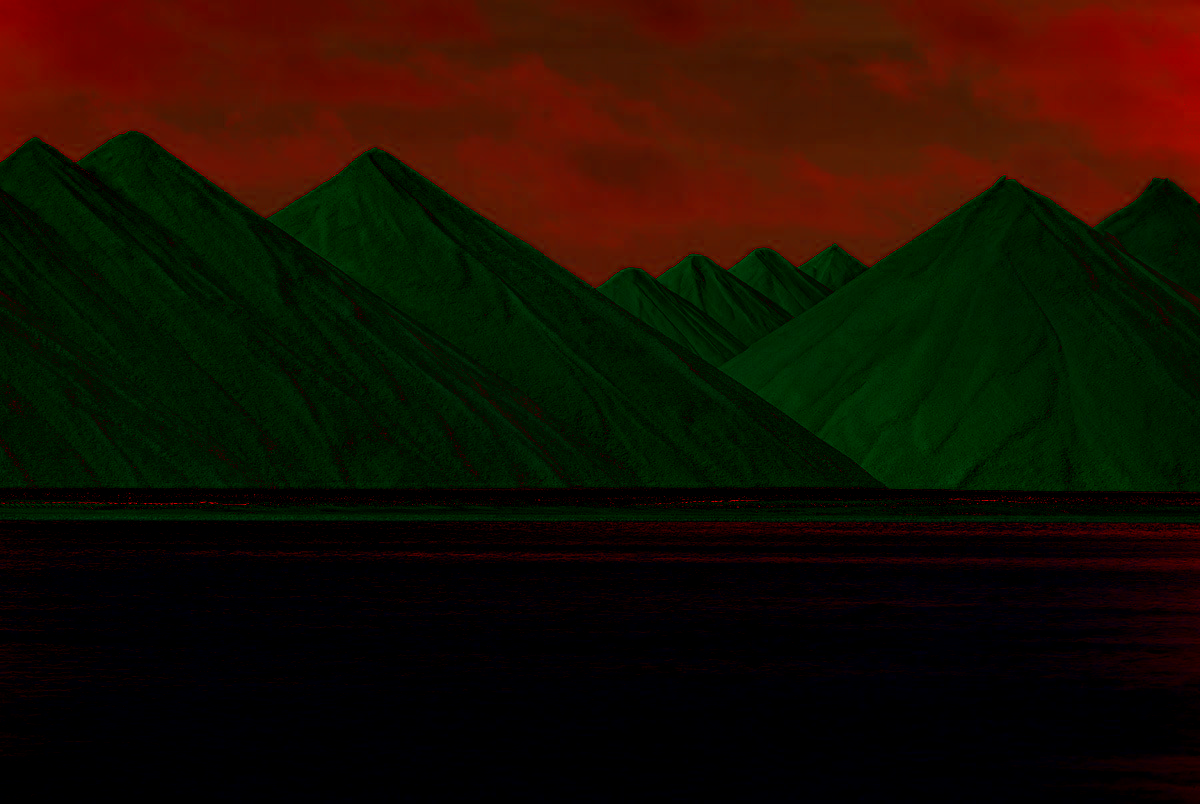

In [68]:
final_image = Image.fromarray( final_image_data, "RGB")

# final_image.save( "image2.jpg")
final_image